In [147]:
"""=============================================================================
Cho dữ liệu Iris.xls
   1. Đọc dữ liệu vào biến data.
   2. Xem thông tin data: info, describe, head.
   3. Tính chiều cao trung bình của petallength, loại hoa Iris versicolor.
   4. Tạo array phần trăm percentiles chứa các phần trăm thứ 2.5, 25, 50, 75, 97.5.
      Tính percentiles của petal lengths từ các mẫu Iris versicolor.
   5. Vẽ percentiles với marker='D', color='red', x và y tương ứng là ptiles_vers và percentiles/100.
   6. Tạo array differences: chênh lệch giữa petallength với mean petallength. 
      Tính bình phương differences. 
      Tính mean square difference và đặt tên là variance_explicit.
   7. Tính variance trên bằng cách sử dung np.var. So sánh kết quả.
   8. Tính căn bậc hai của variance ở câu trên.
   9. Tính độ lệch chuẩn của petallength.
   10. Vẽ biểu đồ thể hiện mối quan hệ của versicolor_petal_length, versicolor_petal_width.
   11. Tìm covariance matrix của versicolor_petal_length, versicolor_petal_width. 
       Trích xuất covariance của petallength và petalwidth từ covariance matrix 
       và đặt tên là petal_cov.
   12. Tìm correlation matrix của versicolor_petal_length, versicolor_petal_width.
       Trích xuất correlation của petallength và petalwidth từ correlation matrix 
       và đặt tên là petal_corr.
   13. Vẽ boxplot của pentallength cho toàn bộ data và của pentallength theo loại.
   14. Dựa trên boxplot trên, hãy cho biết các loại có outlier(s) không?
       Nếu có, dùng z-score để tính và xác định index của outlier(s) theo từng loại 
       (những index nào? giá trị outliers tương ứng cho những index đó?)
   15. Cho các biểu đồ sau:
       from PIL import Image
       import matplotlib.pyplot as plt
       import numpy as np
       img = np.array(Image. open('map1.jpg'))
       plt.figure(figsize=(12,12))
       plt. imshow(img, interpolation='bilinear' )
       plt. axis('off' )
       plt. show()
    Xác định biểu đồ nào có:
       - variance cao nhất trên x
       - covariance cao nhất
       - negative covariance
============================================================================="""
print()

In [149]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sbn

from scipy import stats

In [151]:
print('====================================================')
print('*** 1. Tạo mảng dữ liệu chứa từ nội dung tập tin ***')
print('====================================================')
df_iris = pd.read_excel('data_Buoi7&8/Iris.xls')

print('\nDataframe iris:\n',df_iris)

*** 1. Tạo mảng dữ liệu chứa từ nội dung tập tin ***

Dataframe iris:
      sepallength  sepalwidth  petallength  petalwidth            iris
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [153]:
print('====================================================')
print('*** 2. Xem thông tin data: info, describe, head. ***')
print('====================================================')
print('\nDataframe iris info:')
print(df_iris.info(0))

print('\nDataframe iris describe:\n',df_iris.describe())

*** 2. Xem thông tin data: info, describe, head. ***

Dataframe iris info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataframe iris describe:
        sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.80

In [155]:
print('================================================================')
print('*** 3. Chiều cao trung bình của petallength Iris versicolor. ***')
print('================================================================')

versicolor_petal_length = df_iris['petallength'][df_iris.iris == 'Iris-versicolor'] #Extract petal length of Iris-versicolor

print(f"\nMean of Iris versicolor's petal length = {np.mean(versicolor_petal_length)}")

*** 3. Chiều cao trung bình của petallength Iris versicolor. ***

Mean of Iris versicolor's petal length = 4.26


In [11]:
print('========================================================================================')
print('*** 4. Tạo array phần trăm percentiles chứa các phần trăm thứ 2.5, 25, 50, 75, 97.5. ***')
print('        Tính percentiles của petal lengths từ các mẫu Iris versicolor.                   ')
print('========================================================================================')

percentiles = np.array([2.5, 25, 50, 75, 97.5]) #Array of percentiles to compute

ptl_versi_percent = np.percentile(versicolor_petal_length, percentiles) #Compute percentiles for petallength_versicolor

print()
for i in range(len(percentiles)):
    print(f"Percentile {percentiles[i]}% of Iris-versicolor's petal lenght = {ptl_versi_percent[i]}")

*** 4. Tạo array phần trăm percentiles chứa các phần trăm thứ 2.5, 25, 50, 75, 97.5. ***
        Tính percentiles của petal lengths từ các mẫu Iris versicolor.                   

Percentile 2.5% of Iris-versicolor's petal lenght = 3.3
Percentile 25.0% of Iris-versicolor's petal lenght = 4.0
Percentile 50.0% of Iris-versicolor's petal lenght = 4.35
Percentile 75.0% of Iris-versicolor's petal lenght = 4.6
Percentile 97.5% of Iris-versicolor's petal lenght = 4.9775


***  5. Vẽ percentiles với marker='D', color='red', x và y tương ứng là ptiles_vers và percentiles/100. ***


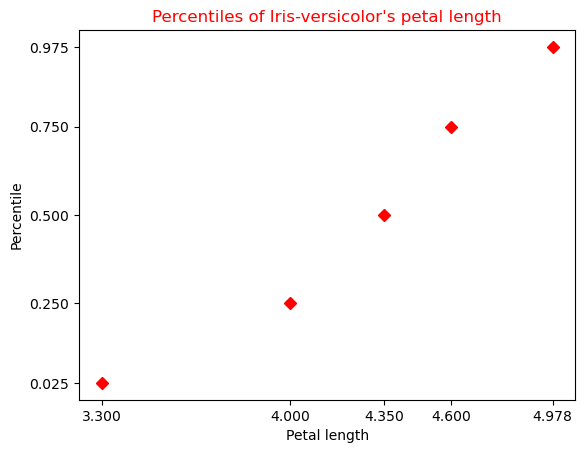

In [13]:
print('============================================================================================================')
print("***  5. Vẽ percentiles với marker='D', color='red', x và y tương ứng là ptiles_vers và percentiles/100. ***")
print('============================================================================================================')

plt.plot(ptl_versi_percent, percentiles/100, marker='D', color='red', linestyle='none');
plt.xlabel('Petal length')
plt.ylabel('Percentile')
plt.xticks(ptl_versi_percent)
plt.yticks(percentiles/100)
plt.title("Percentiles of Iris-versicolor's petal length", color='red')
plt.show()

In [15]:
print('===================================================================================')
print('*** 6. Tạo array differences: chênh lệch giữa petallength với mean petallength. ***')
print('       Tính bình phương differences.                                               ')
print('       Tính mean square difference và đặt tên là variance_explicit.                ')
print('===================================================================================')

differences_versicolor_ptl = versicolor_petal_length - versicolor_petal_length.mean()

variance_explicit = np.square(differences_versicolor_ptl).mean()

print("\nVariance of Iris-versicolor's petal lenght (calculated manually) =",variance_explicit)

*** 6. Tạo array differences: chênh lệch giữa petallength với mean petallength. ***
       Tính bình phương differences.                                               
       Tính mean square difference và đặt tên là variance_explicit.                

Variance of Iris-versicolor's petal lenght (calculated manually) = 0.21640000000000004


In [17]:
print('=========================================================================')
print("***  7. Tính variance trên bằng cách sử dung np.var. So sánh kết quả. ***")
print('=========================================================================')

print(f"\nVariance of Iris-versicolor's petal lenght ( use np.var() ) = {np.var(versicolor_petal_length)}")

***  7. Tính variance trên bằng cách sử dung np.var. So sánh kết quả. ***

Variance of Iris-versicolor's petal lenght ( use np.var() ) = 0.21640000000000012


In [19]:
print('==============================================================')
print("***  8. Tính căn bậc hai của variance_explicit ở câu trên. ***")
print('==============================================================')
print(f"\nStandard deviation of Iris-versicolor's petal lenght = np.sqrt(variance_explicit) = {np.sqrt(variance_explicit)}")

***  8. Tính căn bậc hai của variance_explicit ở câu trên. ***

Standard deviation of Iris-versicolor's petal lenght = np.sqrt(variance_explicit) = 0.4651881339845203


In [21]:
print('============================================================')
print("***  9. Tính độ lệch chuẩn của petallength bằng np.std() ***")
print('============================================================')

print(f"\nStandard deviation of Iris-versicolor's petal lenght = np.std(petallength_versicolor) = {np.std(versicolor_petal_length)}")

***  9. Tính độ lệch chuẩn của petallength bằng np.std() ***

Standard deviation of Iris-versicolor's petal lenght = np.std(petallength_versicolor) = 0.4651881339845204


***  10. Vẽ biểu đồ thể hiện mối quan hệ của versicolor_petal_length, versicolor_petal_width. ***


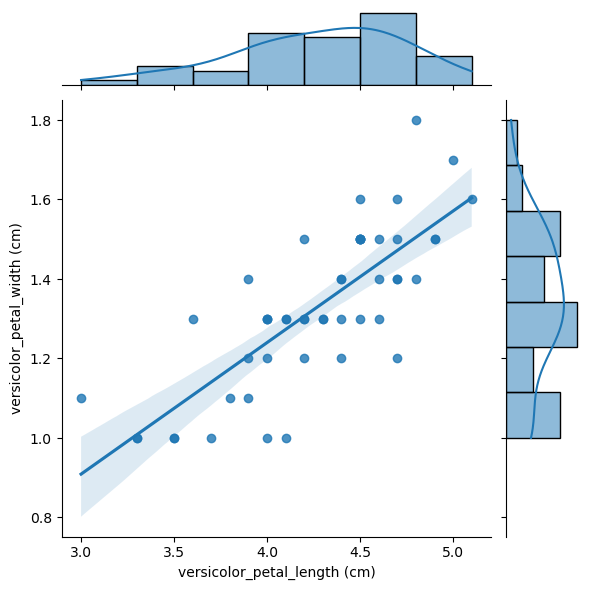

In [157]:
print('=================================================================================================')
print("***  10. Vẽ biểu đồ thể hiện mối quan hệ của versicolor_petal_length, versicolor_petal_width. ***")
print('=================================================================================================')

versicolor_petal_width = df_iris['petalwidth'][df_iris.iris == 'Iris-versicolor']

sbn.jointplot(x=versicolor_petal_length, y=versicolor_petal_width, kind='reg')
plt.xlabel('versicolor_petal_length (cm)')
plt.ylabel('versicolor_petal_width (cm)')
plt.show()

In [25]:
print('=======================================================================================')
print("***  11. Tìm covariance matrix của versicolor_petal_length, versicolor_petal_width. ***")
print('          Trích xuất covariance của petallength và petalwidth từ covariance matrix và đặt tên là petal_cov              ')
print('=======================================================================================')

cov_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

print('\nCovariance matrix of versicolor_petal_length and versicolor_petal_width:\n',cov_matrix)

versicolor_petal_cov = cov_matrix[0][1]
print(f'\nCovariance between versicolor_petal_length and versicolor_petal_width = {versicolor_petal_cov}')

***  11. Tìm covariance matrix của versicolor_petal_length, versicolor_petal_width. ***
          Trích xuất covariance của petallength và petalwidth từ covariance matrix và đặt tên là petal_cov              

Covariance matrix of versicolor_petal_length and versicolor_petal_width:
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]

Covariance between versicolor_petal_length and versicolor_petal_width = 0.07310204081632653


In [27]:
print('========================================================================================')
print("***  12. Tìm correlation matrix của versicolor_petal_length, versicolor_petal_width. ***")
print('          Trích xuất correlation của petallength và petalwidth từ covariance matrix và đặt tên là petal_corr.                  ')
print('========================================================================================')

corr_matrix = np.corrcoef(versicolor_petal_length, versicolor_petal_width)
print('\nCorrelation matrix of versicolor_petal_length and versicolor_petal_width:\n',corr_matrix)

versicolor_petal_corr = corr_matrix[1][0]
print(f'\nCorrelation between versicolor_petal_length and versicolor_petal_width = {versicolor_petal_corr}')

***  12. Tìm correlation matrix của versicolor_petal_length, versicolor_petal_width. ***
          Trích xuất correlation của petallength và petalwidth từ covariance matrix và đặt tên là petal_corr.                  

Correlation matrix of versicolor_petal_length and versicolor_petal_width:
 [[1.         0.78666809]
 [0.78666809 1.        ]]

Correlation between versicolor_petal_length and versicolor_petal_width = 0.7866680885228168


***  13. Vẽ boxplot của petal length cho toàn bộ data và của pentallength theo loại. ***


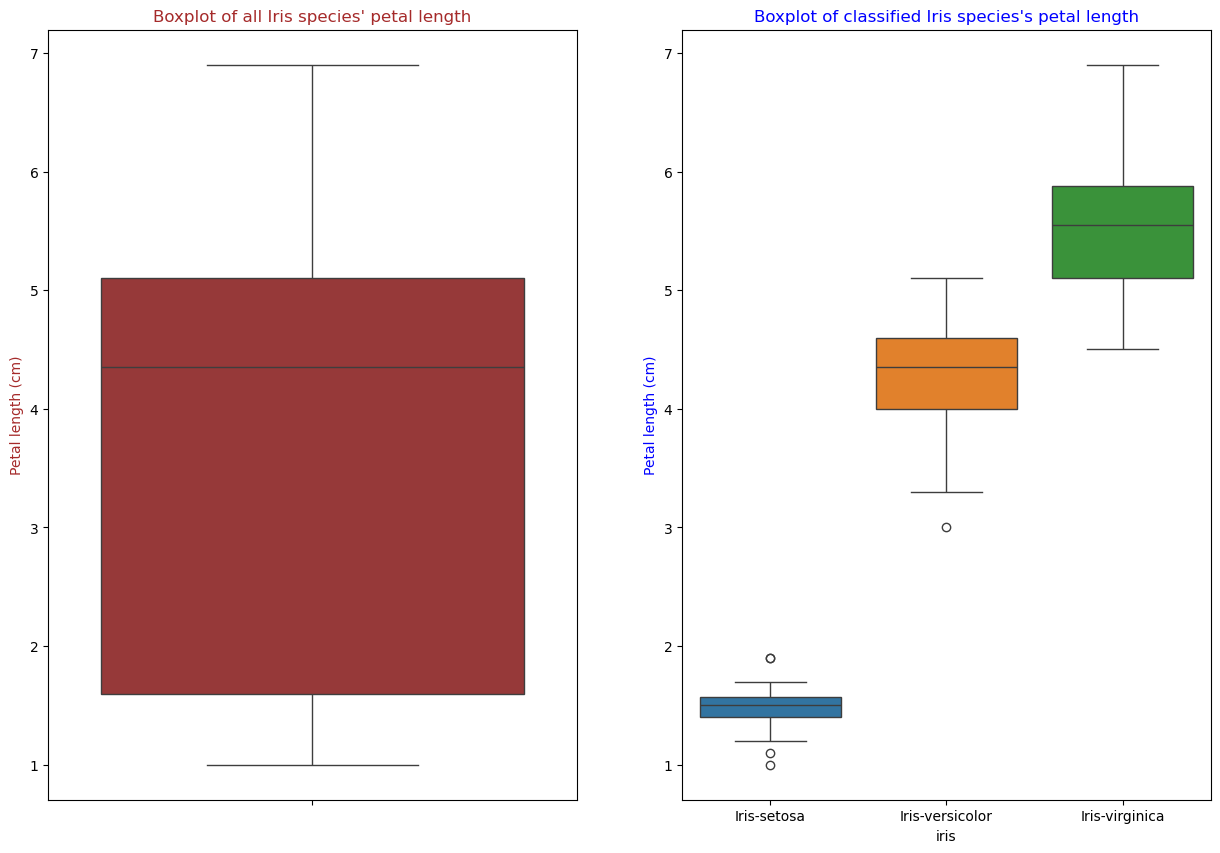

In [29]:
print('========================================================================================')
print("***  13. Vẽ boxplot của petal length cho toàn bộ data và của pentallength theo loại. ***")
print('========================================================================================')

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15,10))
grsp = GridSpec(nrows=1, ncols=2)

box_all = fig.add_subplot(grsp[0,0])
sbn.boxplot(df_iris.petallength, color='brown')
box_all.set_ylabel('Petal length (cm)', color='brown')
box_all.set_title("Boxplot of all Iris species' petal length", color='brown')

box_class = fig.add_subplot(grsp[0,1])
sbn.boxplot(x=df_iris.iris, y=df_iris.petallength, hue=df_iris.iris)
box_class.set_ylabel('Petal length (cm)', color='blue')
box_class.set_title("Boxplot of classified Iris species's petal length", color='blue')

plt.show()

In [285]:
print('========================================================================================')
print("***  14.Dựa trên boxplot trên, hãy cho biết các loại có outlier(s) không? ***")
print("        Nếu có, dùng z-score để tính và xác định index của outlier(s) theo từng loại (z >= 2.5 or z <= -2.5).  ")
print('        (những index nào? giá trị outliers tương ứng cho những index đó?)  ')
print('========================================================================================')

print('\nAccording to the boxplots above, Iris-setosa and Iris-versicolor have outliers')
print()

def z_outliers_index(z): #Create function to return list of original indices that are outliers
    index = []           #Input must be the z-score of the sample
    for i in z.index:
        if ((z[i] >= 2.5) or (z[i] <= -2.5)): index.append(i)
        else: continue
    return index

#-------------outliers of versicolor petal length----------------------#
z_versicolor_petal_length = stats.zscore(versicolor_petal_length) #Get the z-score of versicolor petal length
outs_versicolor_petal_length = versicolor_petal_length[z_outliers_index(z_versicolor_petal_length)] #get the outliers of versi petal length
for i in outs_versicolor_petal_length.index: #print them out
    print(f'Outliers versicolor_petal_length[{i}] = {versicolor_petal_length[i]}')

#-------------outliers of setosa petal length----------------------#
setosa_petal_length = df_iris.petallength[df_iris.iris == 'Iris-setosa']

print()
z_setosa_petal_length = stats.zscore(setosa_petal_length) #Get the z-score of setosa petal length
outs_setosa_petal_length = setosa_petal_length[z_outliers_index(z_setosa_petal_length)] #get the outliers of setosa petal length
for i in outs_setosa_petal_length.index: #print them out
    print(f'Outliers setosa_petal_length[{i}] = {setosa_petal_length[i]}')

***  14.Dựa trên boxplot trên, hãy cho biết các loại có outlier(s) không? ***
        Nếu có, dùng z-score để tính và xác định index của outlier(s) theo từng loại (z >= 2.5 or z <= -2.5).  
        (những index nào? giá trị outliers tương ứng cho những index đó?)  

According to the boxplots above, Iris-setosa and Iris-versicolor have outliers

Outliers versicolor_petal_length[98] = 3.0

Outliers setosa_petal_length[22] = 1.0
Outliers setosa_petal_length[24] = 1.9
Outliers setosa_petal_length[44] = 1.9
